## 따릉이 데이터를 활용한 데이터 분석

- 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보세요. 

## 1. 라이브러리 및 데이터
## Library & Data

In [1]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기
import numpy as np

In [2]:
# 데이터 불러오기
# 모델 학습 파일
# 모델 시험지 파일
#답안지 파일 

## 2. 탐색적 자료분석
## Exploratory Data Analysis (EDA)


### pd.DataFrame.head()
 - 데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/submission.csv')
display(train.head().T, test.head().T)

,0,1,2,3,4
id,3.000,6.000,7.000,8.00,9.000
hour,20.000,13.000,6.000,23.00,18.000
hour_bef_temperature,16.300,20.100,13.900,8.10,29.500
hour_bef_precipitation,1.000,0.000,0.000,0.00,0.000
hour_bef_windspeed,1.500,1.400,0.700,2.70,4.800
hour_bef_humidity,89.000,48.000,79.000,54.00,7.000
hour_bef_visibility,576.000,916.000,1382.000,946.00,2000.000
hour_bef_ozone,0.027,0.042,0.033,0.04,0.057
hour_bef_pm10,76.000,73.000,32.000,75.00,27.000
hour_bef_pm2.5,33.000,40.000,19.000,64.00,11.000


,0,1,2,3,4
id,0.000,1.000,2.00,4.000,5.000
hour,7.000,17.000,13.00,6.000,22.000
hour_bef_temperature,20.700,30.000,19.00,22.500,14.600
hour_bef_precipitation,0.000,0.000,1.00,0.000,1.000
hour_bef_windspeed,1.300,5.400,2.10,2.500,3.400
hour_bef_humidity,62.000,33.000,95.00,60.000,93.000
hour_bef_visibility,954.000,1590.000,193.00,1185.000,218.000
hour_bef_ozone,0.041,0.061,0.02,0.027,0.041
hour_bef_pm10,44.000,49.000,36.00,52.000,18.000
hour_bef_pm2.5,27.000,36.000,28.00,38.000,15.000


+ id : 날짜와 시간별 id
+ hour_bef_temperature : 1시간 전 기온
+ hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
+ hour_bef_windspeed : 1시간 전 풍속(평균)
+ hour_bef_humidity : 1시간 전 습도
+ hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
+ hour_bef_ozone : 1시간 전 오존
+ hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
+ hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
+ count : 시간에 따른 따릉이 대여 수 

### pd.DataFrame.tail()
 - 데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [4]:
train.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


### pd.DataFrame.shape
 - 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [5]:
print(train.shape)
print(test.shape)

(1459, 11)
(715, 10)


### pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지?
 - type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


### pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 
 
 
 
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
   - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
   - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
   - $IQR$ = $Q_3 - Q_1$
 
 
<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="500">

In [7]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


### pd.DataFrame.groupby()
 - 집단에 대한 통계량 확인 
 
<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

In [8]:
train.groupby(['hour']).count()

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,,,,,,,,,,
0,60,59,59,58,59,59,59,59,58,60
1,61,61,61,60,61,61,0,0,0,61
2,61,61,61,60,61,61,61,61,60,61
3,61,61,61,60,61,61,61,61,60,61
4,61,61,61,61,61,61,61,61,60,61
5,61,61,61,61,61,61,61,61,59,61
6,61,61,61,61,61,61,60,60,58,61
7,61,61,61,61,61,61,60,60,59,61
8,61,61,61,61,61,61,61,61,59,61


In [9]:
train.groupby(['hour']).mean()

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,,,,,,,,,,
0,1200.016667,14.788136,0.016949,1.965517,58.169492,1434.220339,0.033763,55.881356,30.982759,71.766667
1,1074.918033,14.155738,0.049180,1.836667,60.459016,1400.852459,NaN,NaN,NaN,47.606557
2,1077.885246,13.747541,0.049180,1.633333,61.721311,1374.278689,0.030492,58.475410,31.366667,31.409836
3,1146.704918,13.357377,0.032787,1.620000,63.131148,1326.311475,0.031213,59.180328,31.466667,21.377049
4,1194.786885,13.001639,0.016393,1.409836,64.573770,1264.606557,0.031984,58.278689,32.116667,13.524590
5,1091.819672,12.673770,0.016393,1.296721,66.000000,1203.426230,0.031623,56.721311,31.525424,13.114754
6,1112.393443,12.377049,0.016393,1.331148,67.409836,1146.229508,0.029317,56.150000,31.603448,24.557377
7,1086.262295,12.191803,0.016393,1.262295,67.934426,1150.311475,0.025300,56.533333,31.779661,62.360656
8,1086.491803,12.600000,0.032787,1.632787,64.049180,1152.868852,0.021197,57.918033,31.796610,136.688525


In [10]:
train.groupby(['hour'])['count'].mean()

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

<AxesSubplot:xlabel='hour'>

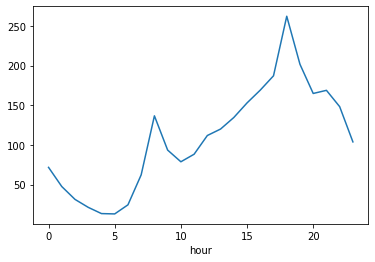

In [11]:
train.groupby(['hour']).mean()['count'].plot()

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['font.size']=14

### plt.plot()의 스타일

색깔

|문자열|약자|
|----|-----|
|blue|b|
|green|g|
|red|r|
|cyan|c|
|magenta|m|
|yellow|y|
|black|k|
|white|w|

마커

|마커|의미|
|----|----|
|.|점|
|o|원|
|v|역삼각형|
|^|삼각형|
|s|사각형|
|*|별|
|x|엑스|
|d|다이아몬드|

선

|문자열|의미|
|-----|-----|
| - | 실선|
|-- | 끊어진 실선|
| -.| 점+실선|
|:|점선|

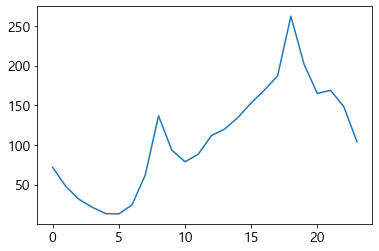

In [13]:
plt.plot(train.groupby(['hour']).mean()['count'])

### plt.title(label, fontsize)
- 그래프 제목 생성

### plt.xlabel(label, fontsize)
- x축 이름 설정

### plt.ylabel(label, fontsize)
- y축 이름 설정

Text(0, 0.5, '이용객 수')

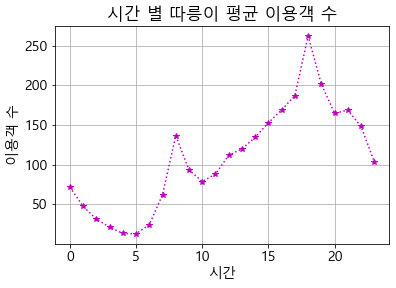

In [14]:
plt.plot(train.groupby(['hour']).mean()['count'], 'm*:')
plt.grid()
plt.title('시간 별 따릉이 평균 이용객 수')
plt.xlabel('시간')
plt.ylabel('이용객 수')

### plt.axvline(x, color)
- 축을 가로지르는 세로 선 생성

### plt.text(x, y, s, fontsize)
- 원하는 위치에 텍스트 생성

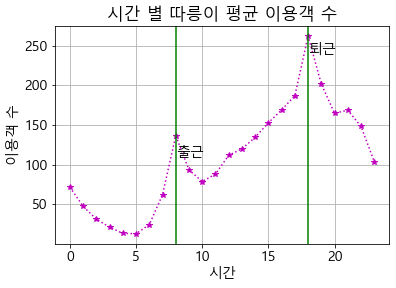

In [15]:
plt.plot(train.groupby(['hour']).mean()['count'], 'm*:')
plt.grid()
plt.title('시간 별 따릉이 평균 이용객 수')
plt.xlabel('시간')
plt.ylabel('이용객 수')

plt.axvline(8, color = 'g')
plt.axvline(18, color = 'g')

plt.text(8, 110, '출근')
plt.text(18, 240, '퇴근')
plt.show()

### 상관계수

- 상관계수: 두 개의 변수가 같이 일어나는 강도를 나타내는 수치 
- -1에서 1사이의 값을 지닙니다. 
- -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치입니다. 
- 분야별로 기준을 정하는 것에 따라 달라지겠지만, 보통 0.4이상이면 두 개의 변수간에 상관성이 있다고 얘기합니다. 

![상관계수](https://t1.daumcdn.net/cfile/tistory/99DEE1425C6A9F2008)

- 상관관계는 인과관계와 다릅니다. 아래의 예시를 확인해 봅시다.

![상관성 예시](https://miro.medium.com/max/684/1*JLYI5eCVEN7ZUWXBIrrapw.png)

- 선글라스 판매량이 증가함에 따라, 아이스크림 판매액도 같이 증가하는 것을 볼 수 있습니다. 
- 하지만 선글라스 판매량이 증가했기 **때문에** 아이스크림 판매액이 증가했다라고 해석하는 것은 타당하지 않습니다. 
- 선글라스 판매량이 증가했다는 것은 여름 때문이라고 볼 수 있으므로, 날씨가 더워짐에 따라 선글라스 판매량과 아이스크림 판매액이 같이 증가했다고 보는 것이 타당할 것입니다. 

### pd.DataFrame.corr()

- correlation coefficient 의 줄임말 입니다 

In [16]:
import seaborn as sns

In [17]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


C:\Users\medici\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\medici\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


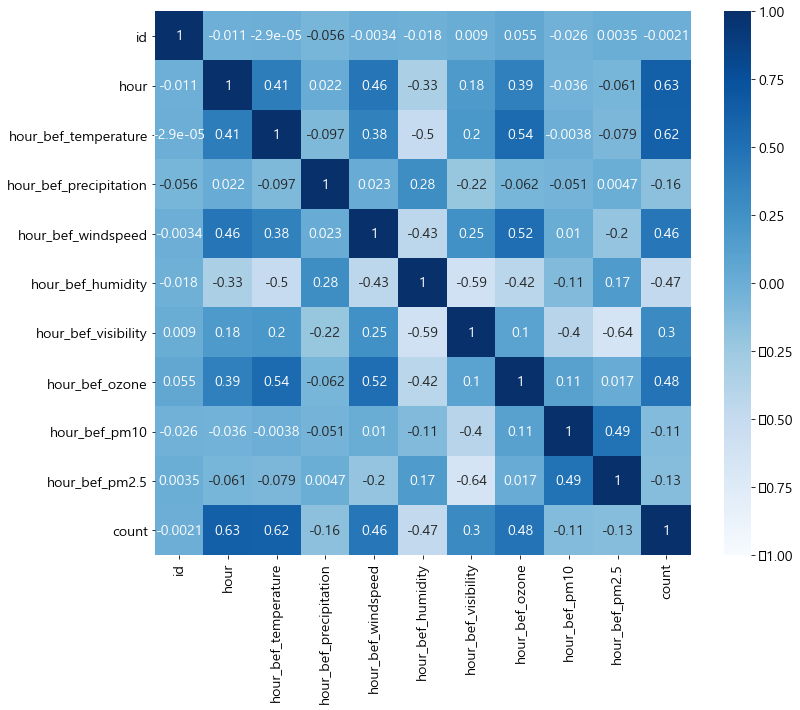

In [18]:
plt.figure(figsize = (12, 10))
sns.heatmap(train.corr(), cmap = 'Blues', annot = True, vmin = -1 ,vmax = 1)
plt.show()

## 3. 데이터 전처리
## Data Cleansing & Pre-Processing  

### pd.Series.isna()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False

In [19]:
display(train.isna().sum())
display(test.isna().sum())

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [20]:
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.

In [105]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# hour을 기준으로 그룹을 묶는다
a1 = train.groupby('hour')['hour_bef_temperature']
train['hour_bef_temperature'] = a1.apply(lambda x : x.fillna(x.mean()))

b1 = test.groupby('hour')['hour_bef_temperature']
test['hour_bef_temperature'] = b1.apply(lambda x : x.fillna(x.mean()))

# hour_bef_precipitation
a1 = train.groupby('hour')['hour_bef_precipitation']
train['hour_bef_precipitation'] = a1.apply(lambda x : x.fillna(x.mean()))

b1 = test.groupby('hour')['hour_bef_precipitation']
test['hour_bef_precipitation'] = b1.apply(lambda x : x.fillna(x.mean()))

# hour_bef_windspeed
a1 = train.groupby('hour')['hour_bef_windspeed']
train['hour_bef_windspeed'] = a1.apply(lambda x : x.fillna(x.mean()))

b1 = test.groupby('hour')['hour_bef_windspeed']
test['hour_bef_windspeed'] = b1.apply(lambda x : x.fillna(x.mean()))

# hour_bef_humidity
a1 = train.groupby('hour')['hour_bef_humidity']
train['hour_bef_humidity'] = a1.apply(lambda x : x.fillna(x.mean()))

b1 = test.groupby('hour')['hour_bef_humidity']
test['hour_bef_humidity'] = b1.apply(lambda x : x.fillna(x.mean()))

# hour_bef_visibility
a1 = train.groupby('hour')['hour_bef_visibility']
train['hour_bef_visibility'] = a1.apply(lambda x : x.fillna(x.mean()))

b1 = test.groupby('hour')['hour_bef_visibility']
test['hour_bef_visibility'] = b1.apply(lambda x : x.fillna(x.mean()))

# hour_bef_ozone
a1 = train.groupby('hour')['hour_bef_ozone']
train['hour_bef_ozone'] = a1.apply(lambda x : x.fillna(x.mean()))

b1 = test.groupby('hour')['hour_bef_ozone']
test['hour_bef_ozone'] = b1.apply(lambda x : x.fillna(x.mean()))

# hour_bef_pm10
a1 = train.groupby('hour')['hour_bef_pm10']
train['hour_bef_pm10'] = a1.apply(lambda x : x.fillna(x.mean()))

b1 = test.groupby('hour')['hour_bef_pm10']
test['hour_bef_pm10'] = b1.apply(lambda x : x.fillna(x.mean()))

# hour_bef_pm2.5
a1 = train.groupby('hour')['hour_bef_pm2.5']
train['hour_bef_pm2.5'] = a1.apply(lambda x : x.fillna(x.mean()))

b1 = test.groupby('hour')['hour_bef_pm2.5']
test['hour_bef_pm2.5'] = b1.apply(lambda x : x.fillna(x.mean()))

m0 = train[train['hour'] == 0]['hour_bef_ozone'].median()
m2 = train[train['hour'] == 2]['hour_bef_ozone'].median()
train['hour_bef_ozone'].fillna((m0 + m2) / 2, inplace = True)

m0 = test[test['hour'] == 0]['hour_bef_ozone'].median()
m2 = test[test['hour'] == 2]['hour_bef_ozone'].median()
test['hour_bef_ozone'].fillna((m0 + m2) / 2, inplace = True)

m0 = train[train['hour'] == 0]['hour_bef_pm10'].median()
m2 = train[train['hour'] == 2]['hour_bef_pm10'].median()
train['hour_bef_pm10'].fillna((m0 + m2) / 2, inplace = True)

m0 = test[test['hour'] == 0]['hour_bef_pm10'].median()
m2 = test[test['hour'] == 2]['hour_bef_pm10'].median()
test['hour_bef_pm10'].fillna((m0 + m2) / 2, inplace = True)

m0 = train[train['hour'] == 0]['hour_bef_pm2.5'].median()
m2 = train[train['hour'] == 2]['hour_bef_pm2.5'].median()
train['hour_bef_pm2.5'].fillna((m0 + m2) / 2, inplace = True)

m0 = test[test['hour'] == 0]['hour_bef_pm2.5'].median()
m2 = test[test['hour'] == 2]['hour_bef_pm2.5'].median()
test['hour_bef_pm2.5'].fillna((m0 + m2) / 2, inplace = True)

display(train.isna().sum())
display(test.isna().sum())

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [106]:
train['pm10'] = [1 if x <= 30 else 2 if x <= 80 else 3 for x in train['hour_bef_pm10']]
train['pm2.5'] = [1 if x <= 15 else 2 if x <= 35 else 3 for x in train['hour_bef_pm2.5']]

test['pm10'] = [1 if x <= 30 else 2 if x <= 80 else 3 for x in test['hour_bef_pm10']]
test['pm2.5'] = [1 if x <= 15 else 2 if x <= 35 else 3 for x in test['hour_bef_pm2.5']]

train['hour_sin'] = np.sin(2 * np.pi * train['hour']/23.0)
train['hour_cos'] = np.cos(2 * np.pi * train['hour']/23.0)

test['hour_sin'] = np.sin(2 * np.pi * test['hour']/23.0)
test['hour_cos'] = np.cos(2 * np.pi * test['hour']/23.0)

# train.drop('hour', axis = 1, inplace=True)
# test.drop('hour', axis = 1, inplace=True)

In [42]:
display(train.isna().sum())
display(test.isna().sum())

id                        0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
pm10                      0
pm2.5                     0
hour_sin                  0
hour_cos                  0
dtype: int64

id                        0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
pm10                      0
pm2.5                     0
hour_sin                  0
hour_cos                  0
dtype: int64

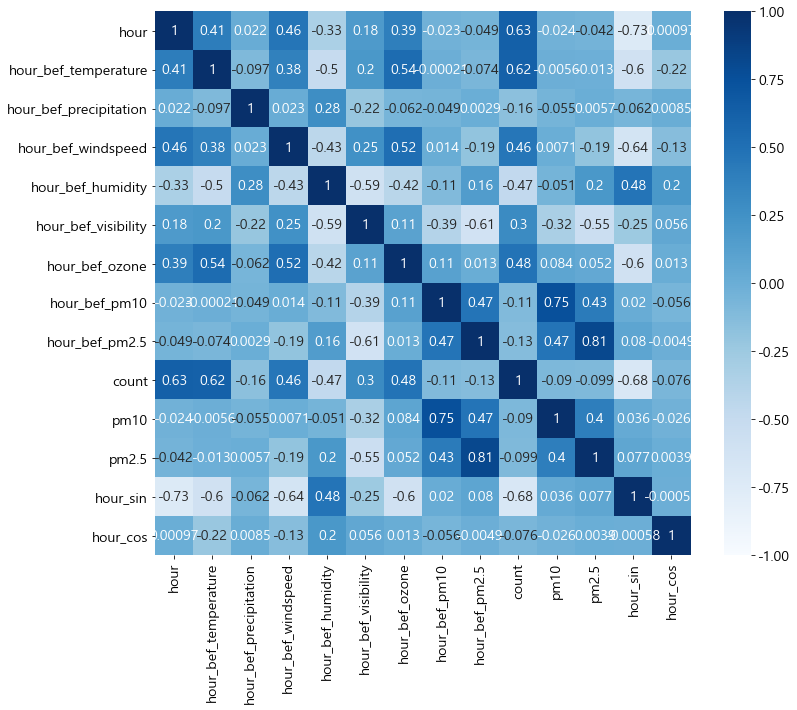

,VIF Factor,features
0,7.784616,hour
1,18.070957,hour_bef_temperature
2,1.216121,hour_bef_precipitation
3,8.029082,hour_bef_windspeed
4,9.179704,hour_bef_humidity
5,8.244922,hour_bef_visibility
6,9.788148,hour_bef_ozone
7,5.988920,hour_bef_pm10
8,8.338337,hour_bef_pm2.5
9,3.640253,hour_sin


In [154]:
train_corr = train.drop('id', axis = 1)
plt.figure(figsize = (12, 10))
sns.heatmap(train_corr.corr(), cmap = 'Blues', annot = True, vmin = -1 ,vmax = 1)
plt.show()
from statsmodels.stats.outliers_influence import variance_inflation_factor
train_vif = train_corr.drop(['count', 'pm2.5', 'pm10'], axis = 1)
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(train_vif.values, i )  for i in range(train_vif.shape[1] ) ]
vif['features'] = train_vif.columns
vif

In [43]:
train

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,pm10,pm2.5,hour_sin,hour_cos
0,3,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,2,2,-7.308360e-01,0.682553
1,6,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,2,3,-3.984011e-01,-0.917211
2,7,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,2,2,9.976688e-01,-0.068242
3,8,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0,2,3,-2.449294e-16,1.000000
4,9,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,1,1,-9.790841e-01,0.203456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0,2,2,8.878852e-01,0.460065
1455,2175,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0,2,2,7.308360e-01,0.682553
1456,2176,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0,1,2,9.790841e-01,0.203456
1457,2178,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0,2,3,-5.195840e-01,0.854419


In [24]:
# train.groupby(['hour']).mean()['hour_bef_ozone'].plot()
# plt.grid()
# plt.show()

In [ ]:
# 'hour','hour_bef_temperature','hour_bef_windspeed','hour_bef_precipitation','hour_bef_humidity'

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

### sklearn.ensemble.RandomForestRegressor()
- 랜덤 포레스트 모형

## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

### model.fit()
- 모델 학습

In [25]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn
import joblib

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.graphics.tsaplots import plot_acf, acf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from statsmodels.tsa.stattools import adfuller

from sklearn.cluster import KMeans 

import warnings
warnings.simplefilter('ignore')

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression, SGDRegressor, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import validation_curve
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC, SVR
from sklearn.compose import make_column_transformer,ColumnTransformer
import math

from sklearn.ensemble import VotingRegressor, RandomForestRegressor, BaggingRegressor
import sklearn.metrics as metrics

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False


In [26]:
target = train['count']
train_df = train.drop('count', axis = 1)
train_df

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,hour_sin,hour_cos
0,3,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,-7.308360e-01,0.682553
1,6,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,-3.984011e-01,-0.917211
2,7,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,9.976688e-01,-0.068242
3,8,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,-2.449294e-16,1.000000
4,9,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,-9.790841e-01,0.203456
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,8.878852e-01,0.460065
1455,2175,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,7.308360e-01,0.682553
1456,2176,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,9.790841e-01,0.203456
1457,2178,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,-5.195840e-01,0.854419


In [27]:
x_train, x_test, y_train, y_test = train_test_split(train_df, target, test_size = 0.2, random_state = 1)

In [28]:
model_ridge = make_pipeline(StandardScaler(), Ridge())
model_lasso = make_pipeline(StandardScaler(), Lasso())
model_lr = make_pipeline(StandardScaler(), LinearRegression())
model_logi = make_pipeline(StandardScaler(), LogisticRegression())
model_dt = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state = 1))

In [29]:
from xgboost import XGBClassifier, XGBRFRegressor, XGBRegressor
model_xgb = make_pipeline(StandardScaler(), XGBRegressor())

In [30]:
model_svm = make_pipeline(StandardScaler(), SVR())
model_bagg = make_pipeline(StandardScaler(), BaggingRegressor())
model_rf = make_pipeline(StandardScaler(), RandomForestRegressor())

In [31]:
model_vote = VotingRegressor(estimators = [('tree', model_dt), ('svm', model_svm), ('xgb', model_xgb), 
                                            ('lr', model_lr), ('bagg', model_bagg), ('rf', model_rf)])
model_vote.fit(train_df, target)

VotingRegressor(estimators=[('tree',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('decisiontreeregressor',
                                              DecisionTreeRegressor(random_state=1))])),
                            ('svm',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())])),
                            ('xgb',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           co...
    

In [32]:
import lightgbm as lgb
d_train = lgb.Dataset(train_df, label=target)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
#params['objective'] = 'binary'
#params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 1459, number of used features: 10
[LightGBM] [Info] Start training from score 108.563400


In [33]:
#Prediction
y_pred=clf.predict(test)
# #convert into binary values
# for i in range(0,99):
#     if y_pred[i]>=.5:       # setting threshold to .5
#        y_pred[i]=1
#     else:  
#        y_pred[i]=0

In [34]:
model_dt = Pipeline( [ ('scl', StandardScaler()), ('tree', DecisionTreeRegressor(max_depth = 3,random_state = 1)) ] )
model_svm = Pipeline( [ ('scl', StandardScaler()), ('svm', SVR()) ] )
model_xgb = Pipeline( [ ('scl', StandardScaler()), ('xgb', XGBRegressor()) ] )
model_lr = Pipeline( [ ('scl', StandardScaler()), ('lr', LinearRegression()) ] )
model_bagg = Pipeline( [ ('scl', StandardScaler()), ('bagg', BaggingRegressor()) ] )
model_rf = Pipeline( [ ('scl', StandardScaler()), ('rf', RandomForestRegressor()) ] )

In [35]:
model_vote = Pipeline( [ ('vote', VotingRegressor(estimators = [('tree', model_dt), ('svm', model_svm), ('xgb', model_xgb), 
                                            ('lr', model_lr), ('bagg', model_bagg), ('rf', model_rf)])) ] )

In [36]:
model_vote.fit(x_train, y_train)

Pipeline(steps=[('vote',
                 VotingRegressor(estimators=[('tree',
                                              Pipeline(steps=[('scl',
                                                               StandardScaler()),
                                                              ('tree',
                                                               DecisionTreeRegressor(max_depth=3,
                                                                                     random_state=1))])),
                                             ('svm',
                                              Pipeline(steps=[('scl',
                                                               StandardScaler()),
                                                              ('svm', SVR())])),
                                             ('xgb',
                                              Pipeline(steps=[('scl',
                                                               StandardScaler()),
   

In [70]:
# grid search
model_xgb = Pipeline( [ ('scl', StandardScaler()), ('xgb', XGBRegressor(n_jobs = 12)) ] )
param_value = {'xgb__n_estimators' : [50, 100, 150, 200, 250, 300],
               'xgb__learning_rate' : [0.01, 0.05, 0.1, 0.5, 1],
               'xgb__max_depth' : list(range(2, 20, 3)),
               'xgb__subsample' : [0.25, 0.5, 0.75, 1],
               'xgb__min_child_weight' : [0.5, 1, 1.5, 2]
              }
gridSearch = GridSearchCV(model_xgb, param_grid = param_value, cv = 5, n_jobs = 12, verbose = 1)
gridSearch.fit(x_train, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     gamma=None, gpu_id=None,
                                                     importance_type='gain',
                                                     interaction_constraints=None,
                                                     learning_rate=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                

In [71]:
gridSearch.best_estimator_

Pipeline(steps=[('scl', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.05,
                              max_delta_step=0, max_depth=17,
                              min_child_weight=1.5, missing=nan,
                              monotone_constraints='()', n_estimators=300,
                              n_jobs=12, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=0.5, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [72]:
gridSearch.best_params_

{'xgb__learning_rate': 0.05,
 'xgb__max_depth': 17,
 'xgb__min_child_weight': 1.5,
 'xgb__n_estimators': 300,
 'xgb__subsample': 0.5}

### model.predict()
- 모델 예측

In [ ]:
model_dt.fit(train_df, target)

In [ ]:
model_svm.fit(train_df, target)

In [ ]:
model_dt.fit(x_train, y_train)
print('train rmse : ', metrics.mean_squared_error(y_train, model_dt.predict(x_train))**0.5)
print('test rmse : ', metrics.mean_squared_error(y_test, model_dt.predict(x_test))**0.5)
print()
model_lr.fit(x_train, y_train)
print('train rmse : ', metrics.mean_squared_error(y_train, model_lr.predict(x_train))**0.5)
print('test rmse : ', metrics.mean_squared_error(y_test, model_lr.predict(x_test))**0.5)
print()
model_xgb.fit(x_train, y_train)
print('train rmse : ', metrics.mean_squared_error(y_train, model_xgb.predict(x_train))**0.5)
print('test rmse : ', metrics.mean_squared_error(y_test, model_xgb.predict(x_test))**0.5)
print()
model_svm.fit(x_train, y_train)
print('train rmse : ', metrics.mean_squared_error(y_train, model_svm.predict(x_train))**0.5)
print('test rmse : ', metrics.mean_squared_error(y_test, model_svm.predict(x_test))**0.5)
print()
model_vote.fit(x_train, y_train)
print('train rmse : ', metrics.mean_squared_error(y_train, model_vote.predict(x_train))**0.5)
print('test rmse : ', metrics.mean_squared_error(y_test, model_vote.predict(x_test))**0.5)
print()
#gridSearch.fit(x_train, y_train)
print('train rmse : ', metrics.mean_squared_error(y_train, gridSearch.best_estimator_.predict(x_train))**0.5)
print('test rmse : ', metrics.mean_squared_error(y_test, gridSearch.best_estimator_.predict(x_test))**0.5)
print()

In [ ]:
model_vote.fit(train_df, target)

In [ ]:
gridSearch.best_params_

In [227]:
train_df = train[['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_precipitation', 'hour_bef_humidity']]

In [228]:
test_df = test[['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_precipitation', 'hour_bef_humidity']]

In [188]:
train_df = pd.get_dummies( train_df, columns = ['pm10'] )
test_df = pd.get_dummies( test_df, columns = ['pm10'] )

KeyError: "None of [Index(['pm10'], dtype='object')] are in the [columns]"

In [193]:
train_df

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity
0,20,16.3,1.0,1.5,89.0
1,13,20.1,0.0,1.4,48.0
2,6,13.9,0.0,0.7,79.0
3,23,8.1,0.0,2.7,54.0
4,18,29.5,0.0,4.8,7.0
...,...,...,...,...,...
1454,4,16.8,0.0,1.6,53.0
1455,3,10.8,0.0,3.8,45.0
1456,5,18.3,0.0,1.9,54.0
1457,21,20.7,0.0,3.7,37.0


In [190]:
test_df

,hour,hour_bef_precipitation,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity
0,7,0.0,20.7,1.3,62.0
1,17,0.0,30.0,5.4,33.0
2,13,1.0,19.0,2.1,95.0
3,6,0.0,22.5,2.5,60.0
4,22,1.0,14.6,3.4,93.0
...,...,...,...,...,...
710,1,0.0,24.6,2.4,60.0
711,1,0.0,18.1,1.0,55.0
712,9,0.0,23.3,2.3,66.0
713,16,0.0,27.0,1.6,46.0


In [182]:
train_df = train.drop('count', axis = 1)

In [229]:
## 현재 최고 점수 모델(model_xgb_grid8_fs.csv)
model_xgb = Pipeline( [ ('scl', StandardScaler()), ('xgb', XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.05,
                              max_delta_step=0, max_depth=17, min_child_weight=1.5,
                              monotone_constraints='()',
                              n_estimators=300, n_jobs=12, num_parallel_tree=1,
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=0.5,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None)) ] )
model_xgb.fit(train_df, target)

Pipeline(steps=[('scl', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.05,
                              max_delta_step=0, max_depth=17,
                              min_child_weight=1.5, missing=nan,
                              monotone_constraints='()', n_estimators=300,
                              n_jobs=12, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=0.5, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [230]:
# submission['count'] = gridSearch.best_estimator_.predict(test)
submission['count'] = model_xgb.predict(test_df)
# submission['count'] = y_pred
submission

,id,count
0,0,84.774033
1,1,268.573425
2,2,56.422153
3,4,30.702339
4,5,42.957188
...,...,...
710,2148,63.520729
711,2149,58.730877
712,2165,114.885277
713,2166,92.054871


### pd.DataFrame.to_csv()
 - csv파일 저장하는 함수

In [226]:
submission.to_csv('model_xgb_grids19_fs.csv', index = False)

## 6. 결과 및 결언
## Conclusion & Discussion